Philip Booth
CS 251/2: Data Analysis and Visualization

Fall 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 6 | Supervised Learning

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D dataset**.

### 1a. Load and visualize spiral data

1. Below, load in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_val_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_val_2.csv`). Each training set has 4,000 samples and each validation set has 1,200 samples (*there is no test set for this development dataset*).
2. Create a 2x2 grid plot showing the train and validation data side-by-side in each version of the dataset.
    - Be sure to label your subplots with informative titles (which dataset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).
3. Convert your datasets from pandas to ndarray format.
4. For this dataset, the labels are a column in the CSV files. Before moving on, create separate arrays to store the training and validation labels. Remove the labels from your train and test dataset arrays (i.e. they should be `(N, 2)`).



#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

Spiral 1 train (4000, 3), classes (4000,)
Spiral 1 validation (1200, 3), classes (1200,)
Spiral 2 train (4000, 3), classes (4000,)
Spiral 2 validation (1200, 3), classes (1200,)

Spiral 1 train data in ndarray format? True
Spiral 1 train class in ndarray format? True
Spiral 1 validation data in ndarray format? True
Spiral 1 validation class in ndarray format? True
Spiral 2 train data in ndarray format? True
Spiral 2 train class in ndarray format? True
Spiral 2 validation data in ndarray format? True
Spiral 2 validation class in ndarray format? True


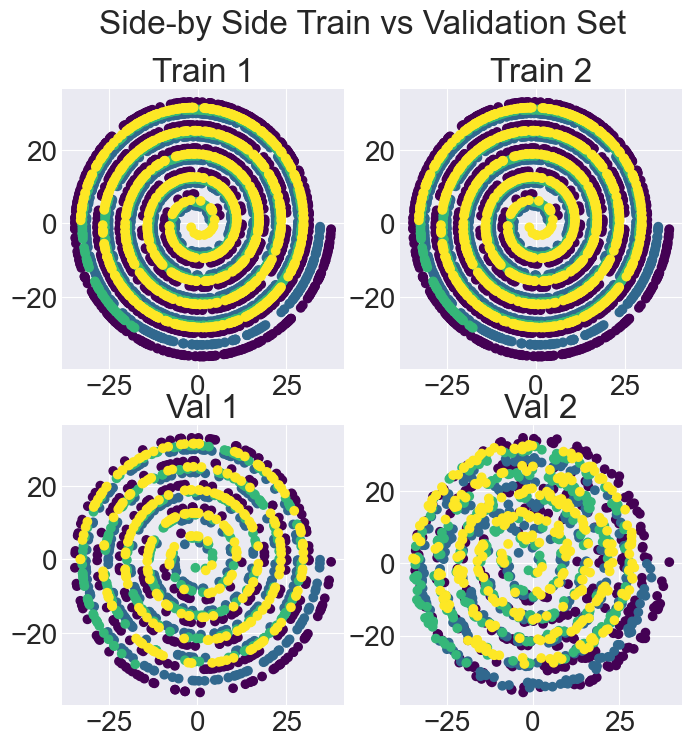

In [3]:
spiral_1_train = pd.read_csv('data/Spiral_Train1.csv').to_numpy()
spiral_2_train = pd.read_csv('data/Spiral_Train2.csv').to_numpy()
spiral_1_val = pd.read_csv('data/Spiral_Validation1.csv').to_numpy()
spiral_2_val = pd.read_csv('data/Spiral_Validation2.csv').to_numpy()

fig, axs = plt.subplots(2,2, figsize = (8,8))

fig.suptitle('Side-by Side Train vs Validation Set')

colors = ['red','green','blue','purple']

spiral_1_train_x = spiral_1_train[:,0]
spiral_1_train_y = spiral_1_train[:,1]
axs[0,0].scatter(spiral_1_train_x,spiral_1_train_y,c=spiral_1_train[:, 2],cmap='viridis')
axs[0,0].set_title('Train 1')

spiral_2_train_x = spiral_2_train[:,0]
spiral_2_train_y = spiral_2_train[:,1]
axs[0,1].scatter(spiral_2_train_x,spiral_2_train_y, c=spiral_2_train[:, 2],cmap='viridis')
axs[0,1].set_title('Train 2')

spiral_1_val_x = spiral_1_val[:,0]
spiral_1_val_y = spiral_1_val[:,1]
axs[1,0].scatter(spiral_1_val_x,spiral_1_val_y, c=spiral_2_val[:, 2], cmap='viridis')
axs[1,0].set_title('Val 1')

spiral_2_val_x = spiral_2_val[:,0]
spiral_2_val_y = spiral_2_val[:,1]
axs[1,1].scatter(spiral_2_val_x,spiral_2_val_y, c=spiral_2_val[:, 2],cmap='viridis')
axs[1,1].set_title('Val 2')


print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 validation {spiral_1_val.shape}, classes {spiral_1_val_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 validation {spiral_2_val.shape}, classes {spiral_2_val_y.shape}')
print()

print(f'Spiral 1 train data in ndarray format? {isinstance(spiral_1_train, np.ndarray)}')
print(f'Spiral 1 train class in ndarray format? {isinstance(spiral_1_train_y, np.ndarray)}')
print(f'Spiral 1 validation data in ndarray format? {isinstance(spiral_1_val, np.ndarray)}')
print(f'Spiral 1 validation class in ndarray format? {isinstance(spiral_1_val_y, np.ndarray)}')
print(f'Spiral 2 train data in ndarray format? {isinstance(spiral_2_train, np.ndarray)}')
print(f'Spiral 2 train class in ndarray format? {isinstance(spiral_2_train_y, np.ndarray)}')
print(f'Spiral 2 validation data in ndarray format? {isinstance(spiral_2_val, np.ndarray)}')
print(f'Spiral 2 validation class in ndarray format? {isinstance(spiral_2_val_y, np.ndarray)}')

In [4]:
spiral_1_train_df = pd.read_csv('data/Spiral_Train1.csv')
spiral_2_train_df = pd.read_csv('data/Spiral_Train2.csv')
spiral_1_val_df = pd.read_csv('data/Spiral_Validation1.csv')
spiral_2_val_df = pd.read_csv('data/Spiral_Validation2.csv')

#ndarrays
spiral_1_train_data = np.array(spiral_1_train_df)
spiral_1_train = spiral_1_train_data[:, :2]
spiral_1_train_y = spiral_1_train_data[:, 2]

spiral_1_val_data = np.array(spiral_1_val_df)
spiral_1_val = spiral_1_val_data[:, :2]
spiral_1_val_y = spiral_1_val_data[:, 2]

spiral_2_train_data = np.array(spiral_2_train_df)
spiral_2_train = spiral_2_train_data[:, :2]
spiral_2_train_y = spiral_2_train_data[:, 2]

spiral_2_val_data = np.array(spiral_2_val_df)
spiral_2_val = spiral_2_val_data[:, :2]
spiral_2_val_y = spiral_2_val_data[:, 2]

### 1b. Implement KNN


Implement the following methods of `Classifier` in `classifier.py`, which will be the parent class to the `KNN` classifier.
- Constructor
- `accuracy(y, y_pred)`: Compute percent correct given true data class labels `y` and algorithm predicted class labels `y_pred`. 

Implement the following methods of `KNN` in `knn.py`. 
- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.

Test relevant methods using the test code below.

In [5]:
from knn import KNN


#### Test: Accuracy

In [6]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))

classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)
print(f'Test accuracy is {acc} and should be 0.06.')

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-NN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)


k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=1 is {acc} and should be 1.0')

Your accuracy with K=1 is 1.0 and should be 1.0


#### Test 2-NN

*Note: The below test code assumes that you resolve voting ties with the class that has a lower index. There is a numpy function that you may feel inclined to use (or not!) that handles this automatically.*

In [8]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_val, k)
acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.88')

true_test_y = np.array([2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

print(f'The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are\n{np.where(true_test_y != spiral_1_y_pred[750:900], 1, 0)}')
print('Seeing all 0s means everything seems to be working great!')

Your accuracy with K=2 is 0.88 and should be 0.88
The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Seeing all 0s means everything seems to be working great!


### 1c. Questions

**Question 1:** Explain why in the above 1-NN test, the accuracy must be 100%.

**Answer 1:** 
Since we use k=1, we will arrive at the closest point and cluster our data point with it. Since we are applying knn to our training dataset we should expect 100% accuracy.

### 1d. Find the best `k`

- Below, "script" your `predict` method on both spiral datasets 1 and 2. Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

In [9]:
def get_k_accuracy(k, classifier, validation_dataset, validation_classes):
    predicted_classes = classifier.predict(validation_dataset, k)
    accuracy = classifier.accuracy(y=validation_classes, y_pred=predicted_classes)
    accuracy = round(accuracy, 4)
    return accuracy

In [10]:
n_classes = 4

classifier1 = KNN(num_classes=n_classes)
classifier1.train(spiral_1_train, spiral_1_train_y)

classifier2 = KNN(num_classes=n_classes)
classifier2.train(spiral_2_train, spiral_2_train_y)

# Get the accuracy values for k = (1, 10) for both datasets
accuracy_spiral_1 = []
for k in range(1, 10):
    acc_of_prediction = get_k_accuracy(k, classifier1, spiral_1_val, spiral_1_val_y)
    accuracy_spiral_1.append(acc_of_prediction)

accuracy_spiral_2 = []
for k in range(1, 30):
    acc_of_prediction2 = get_k_accuracy(k, classifier2, spiral_2_val, spiral_2_val_y)
    accuracy_spiral_2.append(acc_of_prediction2)

print(f'{accuracy_spiral_1}\nk-val with max accuracy: {accuracy_spiral_1.index(max(accuracy_spiral_1)) + 1}.\n')
print(f'{accuracy_spiral_2}\nk-val with max accuracy: {accuracy_spiral_2.index(max(accuracy_spiral_2)) + 1}.')

[0.9325, 0.8792, 0.8383, 0.8008, 0.7533, 0.7383, 0.7, 0.6908, 0.6592]
k-val with max accuracy: 1.

[0.4317, 0.4342, 0.4317, 0.4267, 0.4208, 0.43, 0.4483, 0.4408, 0.4542, 0.455, 0.4658, 0.4608, 0.4575, 0.4525, 0.4417, 0.4508, 0.4367, 0.4267, 0.4242, 0.4267, 0.4208, 0.4142, 0.4092, 0.41, 0.4, 0.3967, 0.3767, 0.39, 0.375]
k-val with max accuracy: 11.


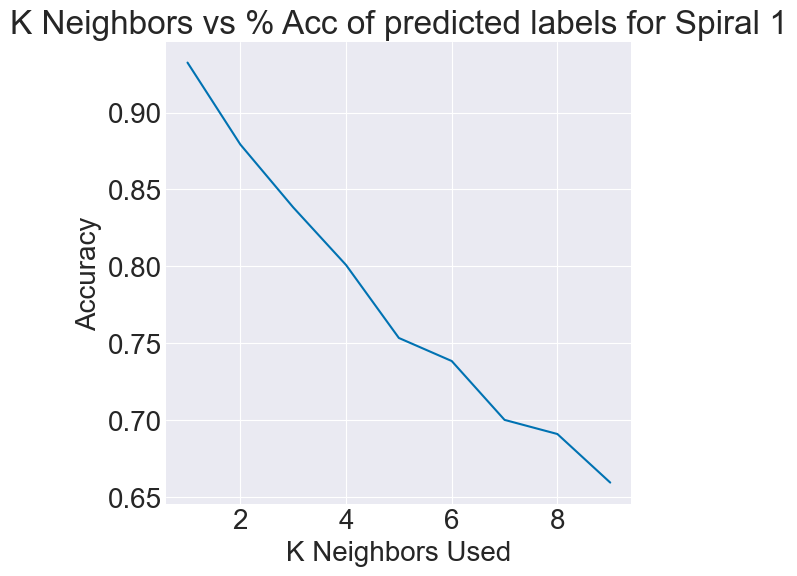

In [11]:
plt.figure(figsize=(6,6))
plt.plot(range(1, 10), accuracy_spiral_1)
plt.xlabel('K Neighbors Used')
plt.ylabel('Accuracy')
plt.title('K Neighbors vs % Acc of predicted labels for Spiral 1')
plt.show()

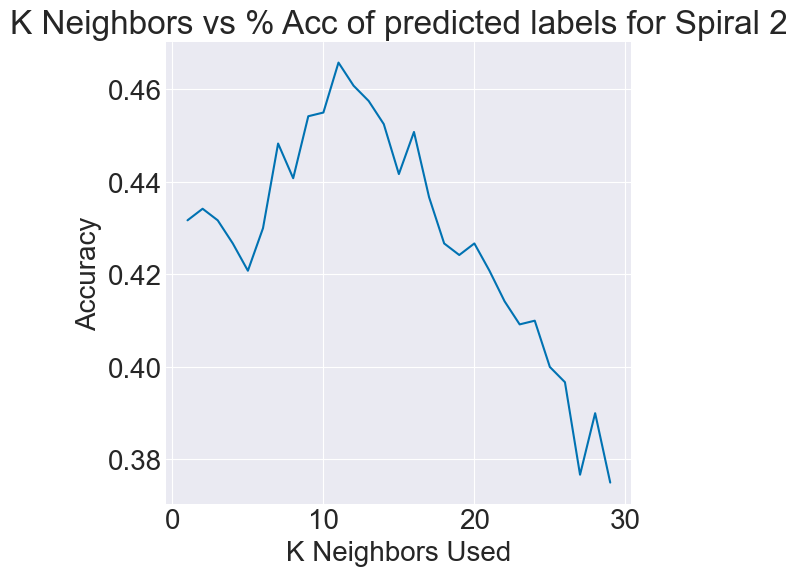

In [12]:
plt.figure(figsize=(6,6))
plt.plot(range(1, 30), accuracy_spiral_2)
plt.xlabel('K Neighbors Used')
plt.ylabel('Accuracy')
plt.title('K Neighbors vs % Acc of predicted labels for Spiral 2')
plt.show()

### 1e. Questions

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Question 3:** Why are the accuracies are so different across the datasets? (*Hint: look at the data*)

**Question 4:** Why are the best `k` values are so different across the datasets?

**Question 5:** Is it a good idea to always set `k` to one of these values when working with another dataset?

**Answer 2:** 
Spiral 1 is k=1 and Spiral 2 k=11 

**Answer 3:** 
After looking at the data for Spiral_1 and Spiral_2 it is clear that the validation data for Spiral_1 is much more clean/organized than validation for Spiral_2. Accuracies would differ between these two datasets because the first validation follows the training data more closely and will have higher accuracy to training data. Spiral_2 on the other hand will have worse accuracies across data because validation does not align as much with its training data.

**Answer 4:** 
In Spiral_1, the validation and training data much more closely resemble each other, so k really only needs to be 1 or 2 to capture the model.

In Spiral_2, the validation and training data do not resemble each other as much and would benefit from a higher k to better classify the model.


**Answer 5:** 
No. We can see that in these 2 datasets the variability and organization of the data heavily impacts the performance of our prediction model and which value of k produces the highest accuracy.

### 1f. Visualize class boundaries

- Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
- For spiral dataset 1 and 2, plot the class boundaries for the k best value determined above.

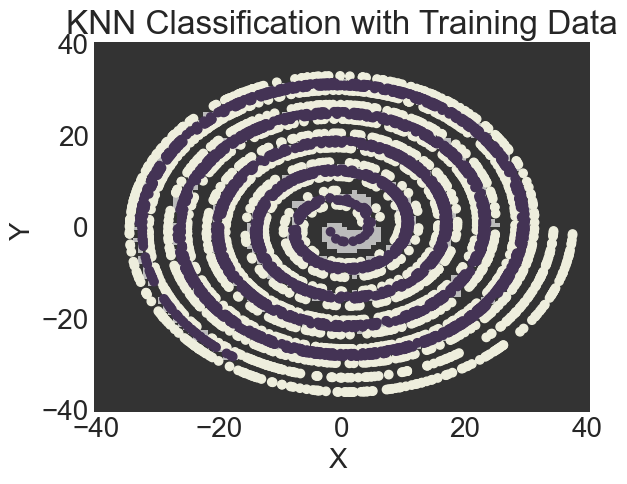

In [13]:
# Visualize KNN boundary 1
n_classes = 4
k = 2

classifier1 = KNN(num_classes=n_classes)
classifier1.train(spiral_1_train, spiral_1_train_y)
classifier1.plot_predictions(k, 100)

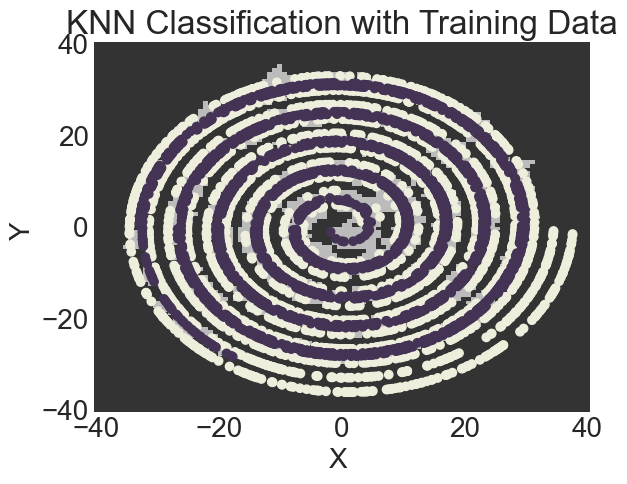

In [15]:
# Visualize KNN boundary 2
n_classes = 4
k = 11

classifier2 = KNN(num_classes=n_classes)
classifier2.train(spiral_2_train, spiral_2_train_y)
classifier2.plot_predictions(k, 100)

### 1g. Questions

**Question 6:** Why could visualizing the class boundaries be useful?

**Answer 6:** Not sure why it's useful. I am not able to tell by this graph